### Python

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/prices.csv", 
                   names = ['Адрес', "Адрес я.", "Площадь", "Кол-во комнат", "Этаж", "Цена 0", "Цена 1", "Дата 0", "Дата 1"])

In [ ]:
data

,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Цена 0,Цена 1,Дата 0,Дата 1
0,0,1,2,3,4,5,6,7,8
1,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",54 м²,3-комнатная,2 этаж,"8,2 млн ₽","7,2 млн ₽",11.11.2017,26.02.2018
2,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",56 м²,3-комнатная,8 этаж,"9,4 млн ₽","10,5 млн ₽",08.10.2015,21.02.2017
3,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",18 м²,1-комнатная,1 этаж,"3,3 млн ₽","3,3 млн ₽",25.07.2015,20.06.2016
4,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",58 м²,3-комнатная,7 этаж,10 млн ₽,10 млн ₽,06.10.2015,03.12.2015
...,...,...,...,...,...,...,...,...,...
787283,"улица Покрышкина, 3","улица Покрышкина, 3",190 м²,5-комнатная,7 этаж,38 млн ₽,38 млн ₽,27.11.2014,02.08.2015
787284,"улица Покрышкина, 3","улица Покрышкина, 3",145 м²,4-комнатная,23 этаж,28 млн ₽,28 млн ₽,27.11.2014,28.07.2015
787285,"улица Покрышкина, 3","улица Покрышкина, 3",52 м²,1-комнатная,5 этаж,"20,5 млн ₽","15,5 млн ₽",10.02.2015,04.06.2015
787286,"улица Покрышкина, 3","улица Покрышкина, 3",190 м²,5-комнатная,24 этаж,"37,6 млн ₽","37,6 млн ₽",08.12.2014,25.05.2015


In [ ]:
streets = pd.read_csv("/content/drive/My Drive/streets.csv", sep = ';', names = ['Улица', 'Код района'], encoding ='cp1251')

In [ ]:
districts = pd.read_csv("/content/drive/My Drive/districts.csv", sep = ';', names = ['Код района', 'Район'], encoding ='cp1251')
districts.drop(districts.head(1).index, inplace=True)

In [ ]:
districts

,Код района,Район
1,100,Центральный административный округ
2,101,район Арбат
3,102,Басманный район
4,103,район Замоскворечье
5,104,Красносельский район
...,...,...
154,1206,поселение Новофедоровское
155,1207,поселение Первомайское
156,1208,поселение Роговское
157,1209,поселение Троицк


In [ ]:
data.drop(data.head(1).index, inplace=True)
data.head(10)

,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Цена 0,Цена 1,Дата 0,Дата 1
1,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",54 м²,3-комнатная,2 этаж,"8,2 млн ₽","7,2 млн ₽",11.11.2017,26.02.2018
2,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",56 м²,3-комнатная,8 этаж,"9,4 млн ₽","10,5 млн ₽",08.10.2015,21.02.2017
3,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",18 м²,1-комнатная,1 этаж,"3,3 млн ₽","3,3 млн ₽",25.07.2015,20.06.2016
4,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",58 м²,3-комнатная,7 этаж,10 млн ₽,10 млн ₽,06.10.2015,03.12.2015
5,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",42 м²,2-комнатная,8 этаж,"8,1 млн ₽","8,1 млн ₽",25.10.2015,29.10.2015
6,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",42 м²,2-комнатная,2 этаж,"9,25 млн ₽","8,6 млн ₽",06.03.2020,В продаже
7,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1","43,5 м²",2-комнатная,5 этаж,"7,7 млн ₽","7,5 млн ₽",29.06.2018,13.10.2019
8,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",44 м²,2-комнатная,3 этаж,"10,4 млн ₽","10,4 млн ₽",08.08.2019,11.09.2019
9,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",42 м²,2-комнатная,2 этаж,"8,1 млн ₽","8,1 млн ₽",19.07.2017,26.11.2018
10,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1","43,1 м²",2-комнатная,1 этаж,"7,6 млн ₽","7,2 млн ₽",07.09.2018,05.11.2018


In [ ]:
print(data.shape)
print(data.isnull().sum())
print(data.info())
data.describe()

(787287, 9)
Адрес            0
Адрес я.         0
Площадь          0
Кол-во комнат    0
Этаж             0
Цена 0           0
Цена 1           0
Дата 0           0
Дата 1           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 787287 entries, 1 to 787287
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Адрес          787287 non-null  object
 1   Адрес я.       787287 non-null  object
 2   Площадь        787287 non-null  object
 3   Кол-во комнат  787287 non-null  object
 4   Этаж           787287 non-null  object
 5   Цена 0         787287 non-null  object
 6   Цена 1         787287 non-null  object
 7   Дата 0         787287 non-null  object
 8   Дата 1         787287 non-null  object
dtypes: object(9)
memory usage: 60.1+ MB
None


,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Цена 0,Цена 1,Дата 0,Дата 1
count,787287,787287,787287,787287,787287,787287,787287,787287,787287
unique,29008,28558,3134,24,71,15267,14756,1992,1989
top,"Рублёвское шоссе, 107","Береговая улица, 4",38 м²,2-комнатная,2 этаж,"6,5 млн ₽","6,5 млн ₽",27.11.2014,21.09.2015
freq,360,960,27404,283231,81230,16326,14255,67470,23790


In [ ]:
data["Цена 0"], data["Цена 1"] = data["Цена 0"].str.replace(' ₽', ''), data["Цена 1"].str.replace(' ₽', '')
data["Цена 0"], data["Цена 1"] = data["Цена 0"].str.replace(',', '.'), data["Цена 1"].str.replace(',', '.')
data["Этаж"] = data["Этаж"].str.replace(' этаж', '')
data["Кол-во комнат"] = data["Кол-во комнат"].str.replace('-комнатная', '')
data["Кол-во комнат"] = data["Кол-во комнат"].str.replace('свободная планировка', '1')
data["Кол-во комнат"] = data["Кол-во комнат"].str.replace('студия', '1')
data["Площадь"] = [sub[ : -3] for sub in data["Площадь"] ]
data["Площадь"]  = data["Площадь"].str.replace(',', '.')
data[['Цена 0, млн','denom 0']] = data["Цена 0"].str.split(" ",expand=True)
data[['Цена 1, млн','denom 1']] = data["Цена 1"].str.split(" ",expand=True)
data["Цена 0, млн"], data["Цена 1, млн"], data["Этаж"], data["Кол-во комнат"], data["Площадь"]=data["Цена 0, млн"].str.strip(), data["Цена 1, млн"].str.strip(), data["Этаж"].str.strip(), data["Кол-во комнат"].str.strip(), data["Площадь"].str.strip()

In [ ]:
data['Цена 0, млн']=data['Цена 0, млн'].str.replace(u'\xa0', u'')
data['Цена 1, млн']=data['Цена 1, млн'].str.replace(u'\xa0', u'')

In [ ]:
print(840685-data['Площадь'].str.isdigit().sum())
print(840685-data['Кол-во комнат'].str.isdigit().sum())
print(840685-data['Этаж'].str.isdigit().sum())
print(840685-data['Цена 0, млн'].str.isdigit().sum())
print(840685-data['Цена 1, млн'].str.isdigit().sum())

243912
53397
53397
673922
692207


In [ ]:
data.loc[data['denom 0'] == 'млрд'].sort_values(by=['Цена 0, млн'], ascending=False)

,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Цена 0,Цена 1,Дата 0,Дата 1,"Цена 0, млн",denom 0,"Цена 1, млн",denom 1
231403,"Кривоарбатский переулок, 16/22","Кривоарбатский переулок, 16/22",120,3,8,9.98 млрд,7.82 млрд,02.04.2015,11.04.2015,9.98,млрд,7.82,млрд
444881,"Староволынская улица, 15к4","Староволынская улица, 15к4",173,4,5,9.91 млрд,7.45 млрд,23.03.2015,10.04.2015,9.91,млрд,7.45,млрд
129280,"Весковский переулок, 3","Весковский переулок, 3",275,7,7,9.91 млрд,9.41 млрд,11.04.2015,16.05.2015,9.91,млрд,9.41,млрд
129254,"Весковский переулок, 3","Весковский переулок, 3",275,7,7,9.91 млрд,9.41 млрд,11.04.2015,16.05.2015,9.91,млрд,9.41,млрд
31442,"3-я Тверская-Ямская улица, 10","3-я Тверская-Ямская улица, 10",215,1,7,9.86 млрд,8.83 млрд,22.03.2015,07.07.2015,9.86,млрд,8.83,млрд
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444752,"Староволынская улица, 15к2","Староволынская улица, 15к2",750,9,15,1.01 млрд,1.03 млрд,13.03.2019,В продаже,1.01,млрд,1.03,млрд
526969,"Якиманский переулок, 6","Якиманский переулок, 6",440,3,4,1.01 млрд,1.01 млрд,01.06.2016,01.02.2017,1.01,млрд,1.01,млрд
16108,"2-й Обыденский переулок, 3с1","2-й Обыденский переулок, 3с1",400,5,7,1 млрд,1 млрд,19.09.2018,26.10.2018,1,млрд,1,млрд
16107,"2-й Обыденский переулок, 3с1","2-й Обыденский переулок, 3с1",400,5,7,1 млрд,592.33 млн,26.10.2018,04.03.2019,1,млрд,592.33,млн


In [ ]:
data['Цена 0, млн'][116366]

'990000'

In [ ]:
data.iloc[116365, ]

Адрес            Булатниковский проезд, 10к2
Адрес я.         Булатниковский проезд, 10к2
Площадь                                   14
Кол-во комнат                              1
Этаж                                       1
Цена 0                               990 000
Цена 1                              1.79 млн
Дата 0                            23.04.2016
Дата 1                            01.02.2018
Цена 0, млн                           990000
denom 0                                 None
Цена 1, млн                             1.79
denom 1                                  млн
Name: 116366, dtype: object

In [ ]:
data['Цена 0, млн']=pd.to_numeric(data['Цена 0, млн'],errors='raise', downcast='float')
data['Цена 1, млн']=pd.to_numeric(data['Цена 1, млн'],errors='raise', downcast='float')
data['Этаж']=pd.to_numeric(data['Этаж'],errors='raise')
data['Кол-во комнат']=pd.to_numeric(data['Кол-во комнат'],errors='raise')
data['Площадь']=pd.to_numeric(data['Площадь'],errors='raise')

In [ ]:
for i in range(1, len(data['Цена 0, млн'])):
    if data['denom 0'][i]=='млрд':
        data['Цена 0, млн'][i]=data['Цена 0, млн'][i]*1000
    elif data['denom 0'][i]==None:
        data['Цена 0, млн'][i]=data['Цена 0, млн'][i]/1000000

for i in range(1, len(data['Цена 1, млн'])):
    if data['denom 1'][i]=='млрд':
        data['Цена 1, млн'][i]=data['Цена 1, млн'][i]*1000
    elif data['denom 1'][i]==None:
        data['Цена 1, млн'][i]=data['Цена 1, млн'][i]/1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__'

In [ ]:
data.groupby('denom 0').describe() 

Площадь                                ... Цена 1, млн                        
            count        mean         std   min  ...         25%     50%     75%     max
denom 0                                          ...                                    
млн      786826.0   63.410552   41.853974  10.0  ...         6.6     8.8    13.0  1570.0
млрд        447.0  273.154810  220.538754  32.0  ...      1210.0  2150.0  4810.0  9710.0

[2 rows x 40 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ceae2e240>,
      dtype=object)

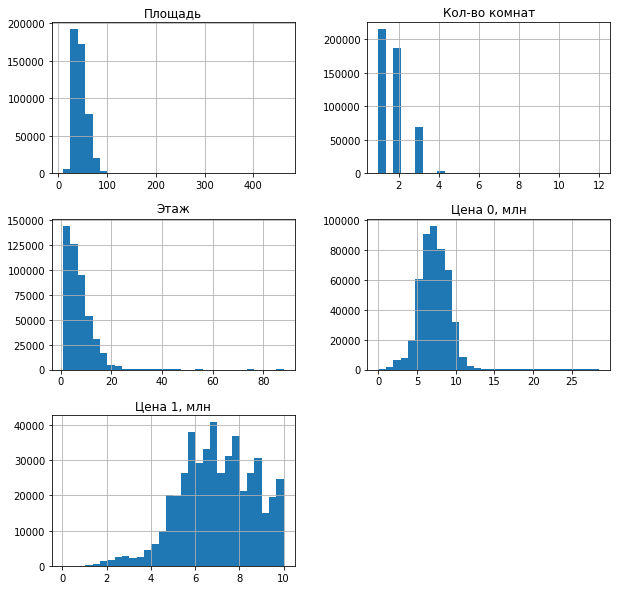

In [ ]:
data.loc[data['Цена 1, млн'] <= 10].hist(figsize=(10, 10), bins=30)

In [ ]:
data.loc[data['Цена 1, млн'] <= 10].describe()

,Площадь,Кол-во комнат,Этаж,"Цена 0, млн","Цена 1, млн"
count,473896.000000,473896.000000,473896.000000,473896.000000,473896.000000
mean,46.398427,1.707493,6.633109,7.213652,7.017021
std,13.304626,0.737767,4.683936,1.825941,1.681529
min,10.000000,1.000000,1.000000,0.035000,0.035000
25%,38.000000,1.000000,3.000000,6.000000,5.890000
50%,44.000000,2.000000,5.000000,7.200000,7.000000
75%,54.000000,2.000000,9.000000,8.500000,8.300000
max,462.000000,12.000000,88.000000,28.500000,10.000000


In [ ]:
data.groupby('denom 1').describe() 

Площадь                          ... Цена 1, млн                     
            count        mean         std  ...         50%     75%          max
denom 1                                    ...                                 
млн      786837.0   63.422150   41.942317  ...         8.8    13.0   999.280029
млрд        435.0  258.011954  209.450320  ...      2230.0  4840.0  9710.000000

[2 rows x 40 columns]

In [ ]:
data=data.drop(['Цена 0', 'Цена 1', 'denom 0', 'denom 1'], axis=1)

In [ ]:
data.head(10)

,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Дата 0,Дата 1,"Цена 0, млн","Цена 1, млн"
1,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",54.0,3,2,11.11.2017,26.02.2018,8.20,7.2
2,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",56.0,3,8,08.10.2015,21.02.2017,9.40,10.5
3,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",18.0,1,1,25.07.2015,20.06.2016,3.30,3.3
4,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",58.0,3,7,06.10.2015,03.12.2015,10.00,10.0
5,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",42.0,2,8,25.10.2015,29.10.2015,8.10,8.1
6,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",42.0,2,2,06.03.2020,В продаже,9.25,8.6
7,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",43.5,2,5,29.06.2018,13.10.2019,7.70,7.5
8,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",44.0,2,3,08.08.2019,11.09.2019,10.40,10.4
9,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",42.0,2,2,19.07.2017,26.11.2018,8.10,8.1
10,"1-й Амбулаторный проезд, 5к1","1-й Амбулаторный проезд, 5к1",43.1,2,1,07.09.2018,05.11.2018,7.60,7.2


In [ ]:
data[['Улица','дом']] = data["Адрес я."].str.split(",",expand=True, n=1)

In [ ]:
data=data.drop(['дом'], axis=1)

In [ ]:
data["Улица"][1000:1075]

1001    1-й Зачатьевский переулок
1002    1-й Зачатьевский переулок
1003    1-й Зачатьевский переулок
1004    1-й Зачатьевский переулок
1005    1-й Зачатьевский переулок
                  ...            
1071    1-й Зачатьевский переулок
1072    1-й Зачатьевский переулок
1073    1-й Зачатьевский переулок
1074    1-й Зачатьевский переулок
1075    1-й Зачатьевский переулок
Name: Улица, Length: 75, dtype: object

**Новая Москва, без районов:**

Троицк 

Щербинка

Кокошкино

Михайлово-Ярцевское

Московский

Мосрентген

Рязановское: Ерино, Знамя Октября, Фабрики имени 1 Мая

Сосенское: Газопровод, Коммунарка

In [ ]:
data2 = pd.merge(data, streets)

In [ ]:
data2

,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Дата 0,Дата 1,"Цена 0, млн","Цена 1, млн",Улица,Код района
0,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",54.0,3,2,11.11.2017,26.02.2018,8.200000,7.200000,1-й Амбулаторный проезд,201
1,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",56.0,3,8,08.10.2015,21.02.2017,9.400000,10.500000,1-й Амбулаторный проезд,201
2,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",18.0,1,1,25.07.2015,20.06.2016,3.300000,3.300000,1-й Амбулаторный проезд,201
3,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",58.0,3,7,06.10.2015,03.12.2015,10.000000,10.000000,1-й Амбулаторный проезд,201
4,"1-й Амбулаторный проезд, 2/6","1-й Амбулаторный проезд, вл2-6",42.0,2,8,25.10.2015,29.10.2015,8.100000,8.100000,1-й Амбулаторный проезд,201
...,...,...,...,...,...,...,...,...,...,...,...
939511,"улица Покрышкина, 3","улица Покрышкина, 3",190.0,5,7,27.11.2014,02.08.2015,38.000000,38.000000,улица Покрышкина,817
939512,"улица Покрышкина, 3","улица Покрышкина, 3",145.0,4,23,27.11.2014,28.07.2015,28.000000,28.000000,улица Покрышкина,817
939513,"улица Покрышкина, 3","улица Покрышкина, 3",52.0,1,5,10.02.2015,04.06.2015,20.500000,15.500000,улица Покрышкина,817
939514,"улица Покрышкина, 3","улица Покрышкина, 3",190.0,5,24,08.12.2014,25.05.2015,37.599998,37.599998,улица Покрышкина,817


In [ ]:
data2['Код района'].isnull().sum()

0

In [ ]:
data2[data2['Улица'].str.contains("Троицк")==True]

,Адрес,Адрес я.,Площадь,Кол-во комнат,Этаж,Дата 0,Дата 1,"Цена 0, млн","Цена 1, млн",Улица,Код района
17088,"2-й Троицкий переулок, 6","2-й Троицкий переулок, 6",172.0,7,3,03.11.2017,В продаже,88.00,75.00,2-й Троицкий переулок,105
17089,"2-й Троицкий переулок, 6","2-й Троицкий переулок, 6",62.0,3,4,24.11.2018,24.12.2018,24.00,24.00,2-й Троицкий переулок,105
17090,"2-й Троицкий переулок, 6","2-й Троицкий переулок, 6",74.0,3,5,20.03.2018,26.11.2018,39.00,33.00,2-й Троицкий переулок,105
17091,"2-й Троицкий переулок, 6","2-й Троицкий переулок, 6",47.3,2,5,11.07.2018,14.07.2018,3.30,3.30,2-й Троицкий переулок,105
17092,"2-й Троицкий переулок, 6","2-й Троицкий переулок, 6",91.7,2,1,07.08.2017,01.11.2017,10.14,10.14,2-й Троицкий переулок,105
...,...,...,...,...,...,...,...,...,...,...,...
705566,"город Троицк, Троицкий бульвар, 7","Троицкий бульвар, 7",68.0,2,6,01.06.2016,30.08.2016,7.45,7.45,Троицкий бульвар,1209
705567,"город Троицк, Троицкий бульвар, 7","Троицкий бульвар, 7",60.0,1,2,01.06.2016,20.08.2016,8.77,8.15,Троицкий бульвар,1209
705568,"город Троицк, Троицкий бульвар, 7","Троицкий бульвар, 7",135.0,3,2,01.04.2016,29.07.2016,11.30,10.30,Троицкий бульвар,1209
705569,"город Троицк, Троицкий бульвар, 7","Троицкий бульвар, 7",91.0,2,6,25.01.2016,01.02.2016,12.74,12.74,Троицкий бульвар,1209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b22bd9588>,
      dtype=object)

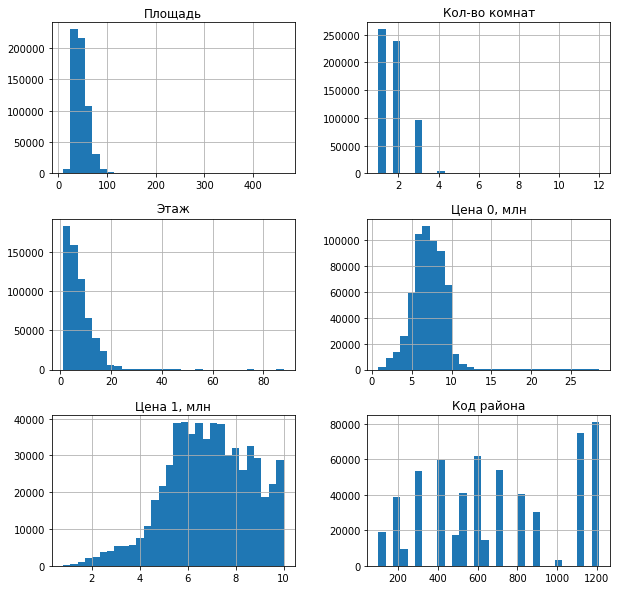

In [ ]:
data2.loc[data2['Цена 1, млн'] <= 10].hist(figsize=(10, 10), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ce1c698d0>,
      dtype=object)

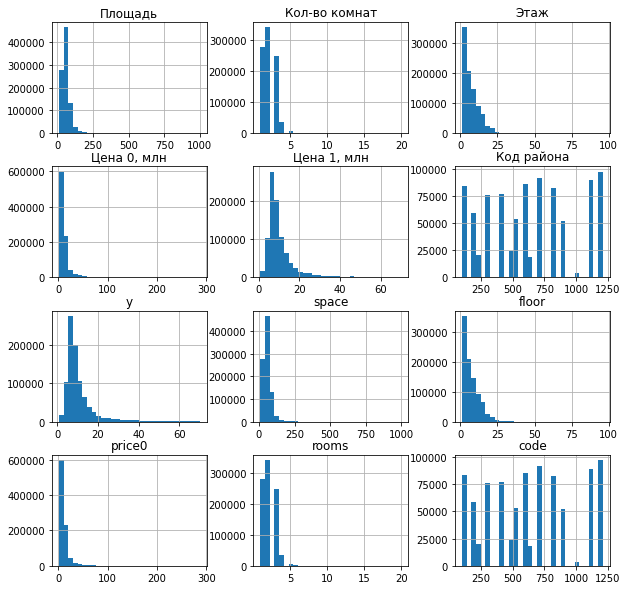

In [ ]:
data2.loc[data2['Цена 1, млн'] < 70].hist(figsize=(10, 10), bins=30)

In [ ]:
fem = data

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
fem["y"] = fem["Цена 1, млн"]
fem["space"]=fem['Площадь']
fem["floor"]=fem['Этаж']
fem["price0"]=fem["Цена 0, млн"]
fem["rooms"]=fem["Кол-во комнат"]
fem["date1"] = data["Дата 1"].str.replace('В продаже', '0')
fem["date0"] = data["Дата 0"]
fem["street"]=fem["Улица"]
fem["address"]=fem["Адрес я."]
#fem["code"]=fem["Код района"]
fem=fem.drop(['Цена 0, млн', "Адрес я.", "Адрес",  'Цена 1, млн', 'Площадь', "Кол-во комнат", "Улица", "Дата 0", "Дата 1", "Этаж"], axis=1)
fem

,y,space,floor,price0,rooms,date1,date0,street,address
0,6.000000,NaN,4,5.000000,3,8,7,1,1
1,7.200000,54.0,2,8.200000,3,26.02.2018,11.11.2017,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6"
2,10.500000,56.0,8,9.400000,3,21.02.2017,08.10.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6"
3,3.300000,18.0,1,3.300000,1,20.06.2016,25.07.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6"
4,10.000000,58.0,7,10.000000,3,03.12.2015,06.10.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6"
...,...,...,...,...,...,...,...,...,...
787283,38.000000,190.0,7,38.000000,5,02.08.2015,27.11.2014,улица Покрышкина,"улица Покрышкина, 3"
787284,28.000000,145.0,23,28.000000,4,28.07.2015,27.11.2014,улица Покрышкина,"улица Покрышкина, 3"
787285,15.500000,52.0,5,20.500000,1,04.06.2015,10.02.2015,улица Покрышкина,"улица Покрышкина, 3"
787286,37.599998,190.0,24,37.599998,5,25.05.2015,08.12.2014,улица Покрышкина,"улица Покрышкина, 3"


In [ ]:
fem.to_csv('cinst01.csv')
!cp cinst01.csv "drive/My Drive/"

In [ ]:
X = fem[['space', 'floor', 'rooms', 'address']]
y=fem['y']

In [ ]:
import pandas as pd

In [ ]:
X=pd.get_dummies(X, sparse=True)

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -16.842695166121377
slope: [ 0.94136366 -0.63669035 -9.36973953]


In [ ]:
fem['y_pred'] = model.predict(X)

In [ ]:
fem['err'] = y_pred-y

In [ ]:
fem

,y,space,floor,price0,rooms,date1,date0,street,address,err,y_pred
1,7.200000,54.0,2,8.200000,3,26.02.2018,11.11.2017,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6",-2.591657,4.608343
2,10.500000,56.0,8,9.400000,3,21.02.2017,08.10.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6",-7.829072,2.670928
3,3.300000,18.0,1,3.300000,1,20.06.2016,25.07.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6",-13.204579,-9.904579
4,10.000000,58.0,7,10.000000,3,03.12.2015,06.10.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6",-4.809654,5.190346
5,8.100000,42.0,8,8.100000,2,29.10.2015,25.10.2015,1-й Амбулаторный проезд,"1-й Амбулаторный проезд, вл2-6",-9.238424,-1.138423
...,...,...,...,...,...,...,...,...,...,...,...
787283,38.000000,190.0,7,38.000000,5,02.08.2015,27.11.2014,улица Покрышкина,"улица Покрышкина, 3",72.710870,110.710870
787284,28.000000,145.0,23,28.000000,4,28.07.2015,27.11.2014,улица Покрышкина,"улица Покрышкина, 3",39.532199,67.532199
787285,15.500000,52.0,5,20.500000,1,04.06.2015,10.02.2015,улица Покрышкина,"улица Покрышкина, 3",4.055024,19.555024
787286,37.599998,190.0,24,37.599998,5,25.05.2015,08.12.2014,улица Покрышкина,"улица Покрышкина, 3",62.287135,99.887134


In [ ]:
house_coefs = fem.groupby('address').agg('mean')

In [ ]:
house_coefs.err.to_csv('coeffserr.csv')
!cp coeffserr.csv "drive/My Drive/"

In [ ]:
panel = pd.read_csv("/content/drive/My Drive/housing/panel.csv")

In [ ]:
panel = panel.drop(['Unnamed: 0', 'X', 'id'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb49671fdd8>,
      dtype=object)

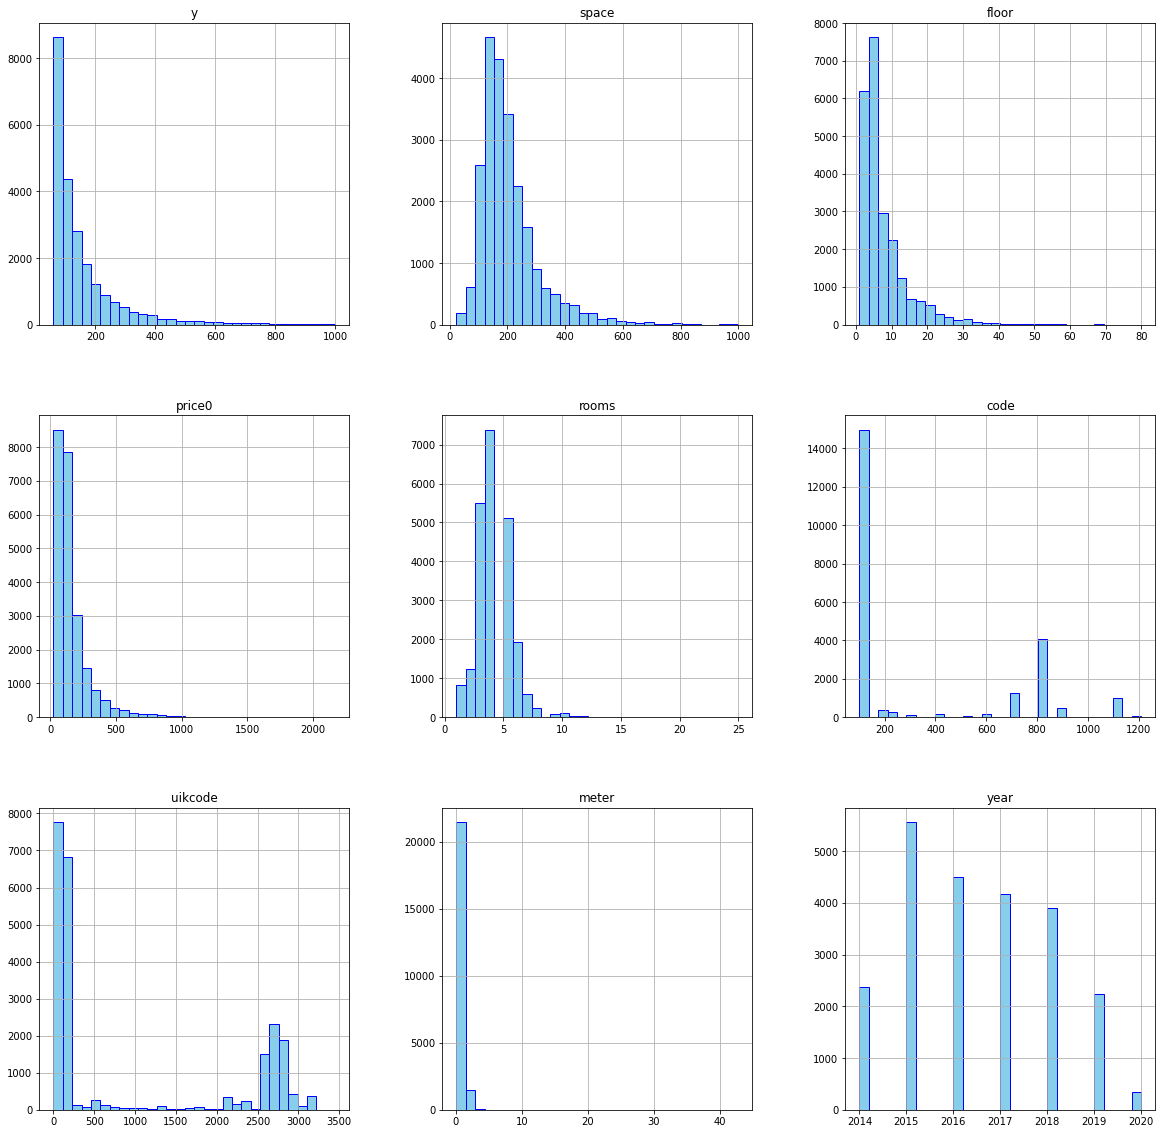

In [ ]:
panel.loc[(panel['y'] < 1000) & (panel['y'] > 60)].hist(figsize=(20, 20), bins=30, color="skyblue", ec="blue")

In [ ]:
panel.loc[(panel['y'] > 60) & (panel['y'] < 1000) ].describe()

,y,space,floor,price0,rooms,code,uikcode,meter,year
count,23093.000000,23093.000000,23093.000000,23093.000000,23093.000000,23093.000000,23093.000000,23093.000000,23093.000000
mean,155.781602,204.124795,7.537825,159.810601,4.128047,336.508855,969.184558,0.807776,2016.421340
std,127.808883,103.241014,6.674123,134.286098,1.506616,340.772067,1208.761930,0.809352,1.560828
min,60.030000,23.000000,1.000000,22.900000,1.000000,101.000000,1.000000,0.074356,2014.000000
25%,79.000000,138.000000,3.000000,80.000000,3.000000,106.000000,75.000000,0.487115,2015.000000
50%,110.000000,180.000000,5.000000,115.000000,4.000000,109.000000,159.000000,0.661210,2016.000000
75%,178.180000,240.000000,9.000000,182.340000,5.000000,702.000000,2590.000000,0.938833,2018.000000
max,999.280000,1000.000000,80.000000,2170.000000,25.000000,1209.000000,3450.000000,42.825652,2020.000000


# R

In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R

install.packages("plm")
install.packages("lmtest")
install.packages("sandwich")
install.packages("readxl")

In [ ]:
%%R
library(tidyverse)
library(ggplot2)
library(haven)
library(dplyr)
library(sandwich)
library(plm)
library(lmtest)
library(readxl)

In [ ]:
%%R

uiks <- read_excel("drive/My Drive/housing/uik.xlsx")

In [ ]:
%%R
uiks

# A tibble: 3,641 x 2
   ID    PolIAddressesList                                                      
   <chr> <chr>                                                                  
 1 1981  Гурьевский проезд, 29к1;Гурьевский проезд, 31к1;Гурьевский проезд, 31к…
 2 932   16-я Парковая, 2к1;16-я Парковая, 2;Первомайская, 128/9                
 3 1014  Молостовых, 14к1;Молостовых, 14к3;Молостовых, 14к4;Молостовых, 14к5;Мо…
 4 1982  Гурьевский проезд, 19к1;Гурьевский проезд, 23к1;Гурьевский проезд, 23к…
 5 1310  Волгоградский проспект, 191;Волгоградский проспект, 195к1;Волгоградски…
 6 1015  Зелёный проспект, 101;Зелёный проспект, 103;Зелёный проспект, 105;Зелё…
 7 1090  Открытое шоссе, 24к2;Открытое шоссе, 24к5Б;Открытое шоссе, 24к5В;Откры…
 8 1491  Мячковский бульвар, 20к2;Поречная, 13к1;Поречная, 13к2;Поречная, 17/22 
 9 1091  Открытое шоссе, 17к1;Открытое шоссе, 17к2;Открытое шоссе, 17к3;Открыто…
10 1311  Ферганский проезд, 7к1;Ферганский проезд, 7к2;Ферганский проезд, 7к3;Ф…
# … wi

In [ ]:
%%R

panel<-read.csv2("drive/My Drive/fem3.csv",  header = T, sep = ",", encoding = "UTF-8")

In [ ]:
%%R

panelcor<-read.csv2("/content/drive/My Drive/housing/panel.csv",  header = T, sep = ",", encoding = "UTF-8")

In [ ]:
%%R

panel$address2 <- gsub(paste0(c("улица ", " улица"),collapse = "|"),"", panel$address)

In [ ]:
%%R

panel$address2[500000]

[1] "Салтыковская, 5к2"


In [ ]:
%%R

l <- strsplit(as.character(uiks$PolIAddressesList), ';')
uik <- data.frame(address2 = unlist(l), uikcode = rep(uiks$ID, lengths(l)))
data <- merge(panel, uik, by = 'address2', all.x = TRUE)

In [ ]:
%%R

data <- panel

In [ ]:
%%R
str(data)

'data.frame':	939647 obs. of  13 variables:
 $ address2: chr  "1 Мая, 2" "1 Мая, 2" "1 Мая, 2" "1 Мая, 2" ...
 $ X       : int  681130 681131 681132 681133 681134 681135 681136 681137 681138 681139 ...
 $ y       : chr  "5.2" "7.55" "4.0" "4.0" ...
 $ space   : chr  "45.0" "60.0" "31.0" "33.0" ...
 $ floor   : int  3 2 3 3 1 2 9 3 3 3 ...
 $ price0  : chr  "5.2" "7.55" "4.2" "4.2" ...
 $ rooms   : int  2 3 1 1 1 1 4 1 2 1 ...
 $ date1   : chr  "11.02.2015" "26.04.2017" "14.02.2017" "11.02.2017" ...
 $ date0   : chr  "27.11.2014" "25.11.2016" "24.11.2016" "23.01.2017" ...
 $ street  : chr  "улица 1 Мая" "улица 1 Мая" "улица 1 Мая" "улица 1 Мая" ...
 $ address : chr  "улица 1 Мая, 2" "улица 1 Мая, 2" "улица 1 Мая, 2" "улица 1 Мая, 2" ...
 $ code    : int  1005 1005 1005 1005 1005 1005 1005 1005 1005 1005 ...
 $ uikcode : chr  NA NA NA NA ...


In [ ]:
%%R

data=na.omit(data)

In [ ]:
%%R

str(data)

'data.frame':	843678 obs. of  13 variables:
 $ address2: chr  "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" ...
 $ X       : int  11 20 16 19 6 14 13 10 21 17 ...
 $ y       : chr  "8.99" "9.0" "4.8" "10.0" ...
 $ space   : chr  "55.0" "41.0" "31.0" "55.0" ...
 $ floor   : int  5 8 4 5 5 3 3 3 5 3 ...
 $ price0  : chr  "8.99" "9.0" "6.1" "10.0" ...
 $ rooms   : int  3 2 1 3 2 1 1 2 2 2 ...
 $ date1   : chr  "13.05.2018" "03.03.2015" "01.02.2017" "25.08.2015" ...
 $ date0   : chr  "15.04.2018" "27.11.2014" "01.06.2016" "27.11.2014" ...
 $ street  : chr  "1-й Амбулаторный проезд" "1-й Амбулаторный проезд" "1-й Амбулаторный проезд" "1-й Амбулаторный проезд" ...
 $ address : chr  "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" ...
 $ code    : int  201 201 201 201 201 201 201 201 201 201 ...
 $ uikcode : chr  "198" "198" "198" "198" ...
 

In [ ]:
%%R

head(panel)

  X    y space floor price0 rooms      date1      date0                  street
1 0  7.2  54.0     2    8.2     3                       1-й Амбулаторный проезд
2 1 10.5  56.0     8    9.4     3 26.02.2018 11.11.2017 1-й Амбулаторный проезд
3 2  3.3  18.0     1    3.3     1 21.02.2017 08.10.2015 1-й Амбулаторный проезд
4 3 10.0  58.0     7   10.0     3 20.06.2016 25.07.2015 1-й Амбулаторный проезд
5 4  8.1  42.0     8    8.1     2 03.12.2015 06.10.2015 1-й Амбулаторный проезд
6 5  8.6  42.0     2   9.25     2 29.10.2015 25.10.2015 1-й Амбулаторный проезд
                         address code                       address2
1 1-й Амбулаторный проезд, вл2-6  201 1-й Амбулаторный проезд, вл2-6
2 1-й Амбулаторный проезд, вл2-6  201 1-й Амбулаторный проезд, вл2-6
3 1-й Амбулаторный проезд, вл2-6  201 1-й Амбулаторный проезд, вл2-6
4 1-й Амбулаторный проезд, вл2-6  201 1-й Амбулаторный проезд, вл2-6
5 1-й Амбулаторный проезд, вл2-6  201 1-й Амбулаторный проезд, вл2-6
6   1-й Амбулаторный проез

In [ ]:
%%R
attach(data)
data$y = as.numeric(y)
data$space = as.numeric(space)
data$price0 = as.numeric(price0)
data$meter = data$y/data$space
data$code = factor(code)
data$street = factor(street)
data$year=factor(format(as.Date(data$date0, format="%d.%m.%Y"),"%Y"))
data$date0=factor(format(as.Date(data$date0, format="%d.%m.%Y"),"%d.%m.%Y"))
data$date1=factor(format(as.Date(data$date1, format="%d.%m.%Y"),"%d.%m.%Y"))
data$id <- seq.int(nrow(data))
panel=data

In [ ]:
%%R
panel=na.omit(panel)
str(panel)

'data.frame':	768801 obs. of  15 variables:
 $ X       : int  1 2 3 4 5 7 8 9 10 11 ...
 $ y       : num  10.5 3.3 10 8.1 8.6 10.4 8.1 7.2 2.2 8.99 ...
 $ space   : num  56 18 58 42 42 44 42 43.1 47 55 ...
 $ floor   : int  8 1 7 8 2 3 2 1 3 5 ...
 $ price0  : num  9.4 3.3 10 8.1 9.25 10.4 8.1 7.6 2.2 8.99 ...
 $ rooms   : int  3 1 3 2 2 2 2 2 2 3 ...
 $ date1   : Factor w/ 1987 levels "01.01.2015","01.01.2016",..: 1646 1323 1280 195 1874 849 712 1694 324 822 ...
 $ date0   : Factor w/ 1992 levels "01.01.2015","01.01.2016",..: 721 515 1610 382 1625 1862 509 1224 446 949 ...
 $ street  : Factor w/ 2048 levels "1-й Амбулаторный проезд",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ address : chr  "1-й Амбулаторный проезд, вл2-6" "1-й Амбулаторный проезд, вл2-6" "1-й Амбулаторный проезд, вл2-6" "1-й Амбулаторный проезд, вл2-6" ...
 $ code    : Factor w/ 146 levels "101","102","103",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ address2: chr  "1-й Амбулаторный проезд, вл2-6" "1-й Амбулаторный проезд, вл2-6" "1

In [ ]:
%%R

install.packages("GGally")
library(GGally)

In [ ]:
%%R

panelcor = subset(panel, select = -c(street, address2, X, date1, date0, address, code, year, id))

head(panelcor)


     y space floor price0 rooms     meter
2 10.5    56     8   9.40     3 0.1875000
3  3.3    18     1   3.30     1 0.1833333
4 10.0    58     7  10.00     3 0.1724138
5  8.1    42     8   8.10     2 0.1928571
6  8.6    42     2   9.25     2 0.2047619
8 10.4    44     3  10.40     2 0.2363636


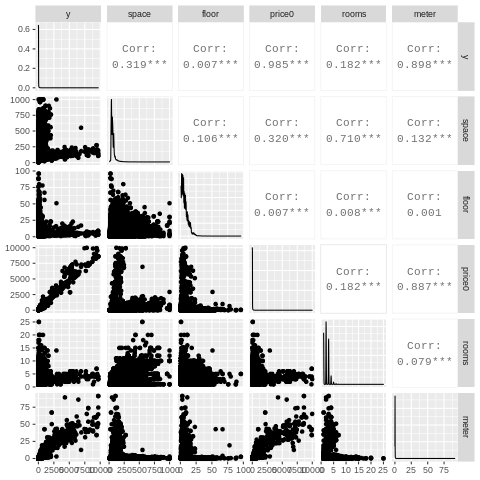

In [ ]:
%%R

ggpairs(panelcor)

In [ ]:
%%R

install.packages('mctest')
library(mctest)

In [ ]:
%%R

panelcor = subset(panelcor, select = -c(y))


R[write to console]: Error in ncol(x) : object 'x' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> omcdiag -> ncol




Error in ncol(x) : object 'x' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> omcdiag -> ncol


In [ ]:
%%R

pooledm <- lm(meter~rooms+floor+space, data = panel)
summary(pooledm)


Call:
lm(formula = meter ~ rooms + floor + space, data = panel)

Residuals:
   Min     1Q Median     3Q    Max 
-2.645 -0.059 -0.023  0.016 90.999 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.123e-01  2.344e-03   47.89   <2e-16 ***
rooms       -2.254e-02  1.221e-03  -18.46   <2e-16 ***
floor       -2.131e-03  1.679e-04  -12.69   <2e-16 ***
space        2.679e-03  2.974e-05   90.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7094 on 676319 degrees of freedom
Multiple R-squared:  0.01797,	Adjusted R-squared:  0.01797 
F-statistic:  4126 on 3 and 676319 DF,  p-value: < 2.2e-16



In [ ]:
%%R

pooledgrade <- lm(y~rooms+floor+space, data = m1)
summary(pooled)


Call:
lm(formula = y ~ rooms + floor + space, data = panel)

Residuals:
   Min     1Q Median     3Q    Max 
-820.8   -6.2    0.2    4.2 9627.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.025566   0.307933  -52.04   <2e-16 ***
rooms        -9.291716   0.160357  -57.94   <2e-16 ***
floor        -0.642283   0.022058  -29.12   <2e-16 ***
space         0.924036   0.003906  236.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.19 on 676319 degrees of freedom
Multiple R-squared:  0.1069,	Adjusted R-squared:  0.1069 
F-statistic: 2.699e+04 on 3 and 676319 DF,  p-value: < 2.2e-16



In [ ]:
%%R

pooled <- lm(y~rooms+floor+space, data=panel)
summary(pooled)


Call:
lm(formula = y ~ rooms + floor + space, data = panel)

Residuals:
   Min     1Q Median     3Q    Max 
-820.8   -6.2    0.2    4.2 9627.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.025566   0.307933  -52.04   <2e-16 ***
rooms        -9.291716   0.160357  -57.94   <2e-16 ***
floor        -0.642283   0.022058  -29.12   <2e-16 ***
space         0.924036   0.003906  236.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.19 on 676319 degrees of freedom
Multiple R-squared:  0.1069,	Adjusted R-squared:  0.1069 
F-statistic: 2.699e+04 on 3 and 676319 DF,  p-value: < 2.2e-16



In [ ]:
%%R

omcdiag(pooled)


Call:
omcdiag(mod = pooled)


Overall Multicollinearity Diagnostics

                        MC Results detection
Determinant |X'X|:          0.4859         0
Farrar Chi-Square:     488163.5218         1
Red Indicator:              0.4144         0
Sum of Lambda Inverse:      5.1139         0
Theil's Method:             0.8292         1
Condition Number:           7.9065         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



In [ ]:
%%R

imcdiag(pooled)


Call:
imcdiag(mod = pooled)


All Individual Multicollinearity Diagnostics Result

         VIF    TOL         Wi        Fi Leamer   CVIF Klein IND1   IND2
rooms 2.0351 0.4914 350039.182 700079.40 0.7010 2.1007     1    0 1.4629
floor 1.0207 0.9797   7015.465  14030.95 0.9898 1.0536     0    0 0.0585
space 2.0580 0.4859 357773.390 715547.84 0.6971 2.1243     1    0 1.4786

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

* all coefficients have significant t-ratios

R-square of y on all x: 0.1069 

* use method argument to check which regressors may be the reason of collinearity


In [ ]:
%%R

anova(pooledm, pooled)

Analysis of Variance Table

Response: meter
              Df Sum Sq Mean Sq   F value Pr(>F)    
rooms          1   2147  2146.6 4264.9515 <2e-16 ***
floor          1      0     0.0    0.0179 0.8936    
space          1   4083  4083.4 8113.2015 <2e-16 ***
Residuals 676319 340394     0.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R

vif(pooledm)

R[write to console]: Error in vif(pooledm) : could not find function "vif"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in vif(pooledm) : could not find function "vif"
Calls: <Anonymous> -> <Anonymous> -> withVisible


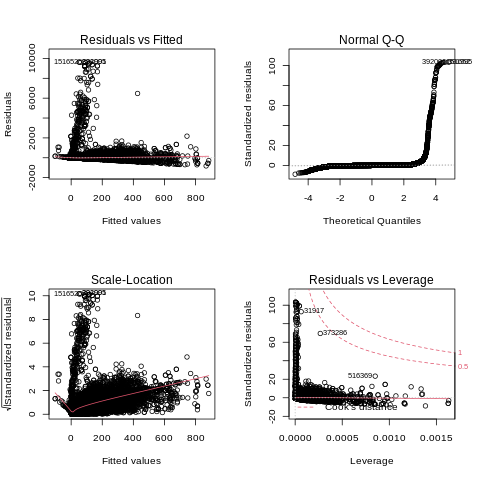

In [ ]:
%%R
# Диагностика всего массива
par(mfrow=c(2,2))
plot(pooled)

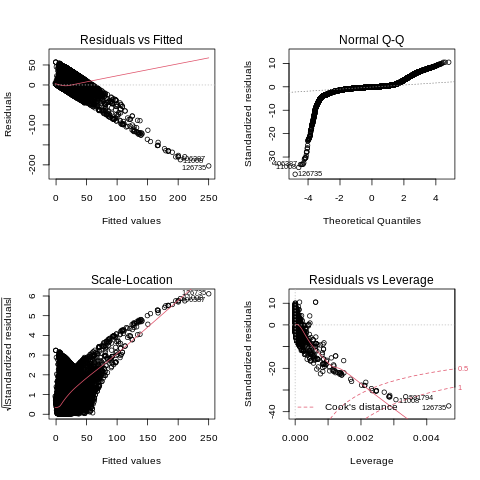

In [ ]:
%%R
# Диагностика данных 1 уровня (до 60 млн.)
par(mfrow=c(2,2))
plot(pooledgrade)

In [ ]:
%%R
install.packages("jtools")
library(jtools)

In [ ]:
%%R
install.packages("huxtable")
library(huxtable)

In [ ]:
%%R

export_summs(pooledm, pooled, model.names = c("Square meter","Apartment"),
               coefs = c("Rooms" = "rooms",
                         "Floor" = "floor",
                         "Area" = "space"),
               scale = TRUE, robust = TRUE)

───────────────────────────────────────────────────────────────────────────────
                                       Square meter                 Apartment  
                          ─────────────────────────────────────────────────────
  Rooms                                   -0.02 ***                 -9.37 ***  
                                          (0.00)                    (0.34)     
  Floor                                   -0.01 ***                 -3.33 ***  
                                          (0.00)                    (0.12)     
  Area                                     0.11 ***                 38.45 ***  
                                          (0.00)                    (0.56)     
                          ─────────────────────────────────────────────────────
  N                                   676323                    676323         
  R2                                       0.02                      0.11      
────────────────────────────────────────

In [ ]:
%%R
LSDV <- lm(meter~code+floor+space+rooms, data = panel)
summary(LSDV)


Call:
lm(formula = meter ~ code + floor + space + rooms, data = panel)

Residuals:
   Min     1Q Median     3Q    Max 
-2.067 -0.037 -0.006  0.021 90.597 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5959818  0.0083614  71.278  < 2e-16 ***
code102     -0.3627424  0.0111584 -32.508  < 2e-16 ***
code103     -0.2892240  0.0117245 -24.668  < 2e-16 ***
code104     -0.2837688  0.0127760 -22.211  < 2e-16 ***
code105     -0.3832622  0.0108848 -35.211  < 2e-16 ***
code106     -0.1276482  0.0100611 -12.687  < 2e-16 ***
code107     -0.4210930  0.0097998 -42.970  < 2e-16 ***
code108     -0.2083896  0.0106935 -19.488  < 2e-16 ***
code109      0.0041324  0.0104809   0.394 0.693377    
code110     -0.3707209  0.0103331 -35.877  < 2e-16 ***
code201     -0.4339753  0.0116011 -37.408  < 2e-16 ***
code202     -0.4217200  0.0172010 -24.517  < 2e-16 ***
code203     -0.4904834  0.0098201 -49.947  < 2e-16 ***
code205     -0.4690082

From cffi callback <function _processevents at 0x7f8d32ccb6a8>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


  0.0110189 -42.564  < 2e-16 ***
code206     -0.5116969  0.0246556 -20.754  < 2e-16 ***
code207     -0.4750500  0.0102228 -46.470  < 2e-16 ***
code208     -0.5020921  0.0128235 -39.154  < 2e-16 ***
code209     -0.5104317  0.0174066 -29.324  < 2e-16 ***
code210     -0.4775342  0.0147137 -32.455  < 2e-16 ***
code211     -0.4786412  0.0169060 -28.312  < 2e-16 ***
code212     -0.5571931  0.0281935 -19.763  < 2e-16 ***
code213     -0.4537605  0.0129732 -34.977  < 2e-16 ***
code214     -0.4197147  0.0140434 -29.887  < 2e-16 ***
code215     -0.4562617  0.0160912 -28.355  < 2e-16 ***
code216     -0.4907760  0.0170969 -28.706  < 2e-16 ***
code217     -0.4091108  0.0139219 -29.386  < 2e-16 ***
code301     -0.4408719  0.0153567 -28.709  < 2e-16 ***
code302     -0.4969058  0.0118184 -42.045  < 2e-16 ***
code303     -0.4988548  0.0116598 -42.784  < 2e-16 ***
code304     -0.4933728  0.0171509 -28.767  < 2e-16 ***
code305     -0.4632985  0.0301495 -15.367  < 2e-16 ***
code306     -0.4880346  0.013551

In [ ]:
%%R
fe <- plm( meter~ floor + space + rooms + year, data = panel, index=c("code", "id"), model="within")
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = meter ~ floor + space + rooms + year, data = panel, 
    model = "within", index = c("code", "id"))

Unbalanced Panel: n = 143, T = 3-34649, N = 768801

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.0690513 -0.0372701 -0.0061768  0.0214223 90.5993380 

Coefficients:
            Estimate  Std. Error  t-value  Pr(>|t|)    
floor     5.0064e-04  1.5021e-04   3.3329 0.0008594 ***
space     1.7177e-03  2.7999e-05  61.3485 < 2.2e-16 ***
rooms    -1.8459e-02  1.0876e-03 -16.9721 < 2.2e-16 ***
year2015  4.2658e-03  2.7037e-03   1.5778 0.1146231    
year2016  1.8207e-03  2.8165e-03   0.6464 0.5179926    
year2017  1.6543e-03  2.9018e-03   0.5701 0.5686152    
year2018 -7.7943e-04  2.9297e-03  -0.2660 0.7902054    
year2019  5.0850e-03  3.4771e-03   1.4624 0.1436219    
year2020 -1.3900e-03  6.7646e-03  -0.2055 0.8372018    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares

In [ ]:
%%R
fe <- plm( y ~ floor + rooms + year, data = panel, index=c("code", "id"), model="within")
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ floor + rooms + year, data = panel, model = "within", 
    index = c("code", "id"))

Unbalanced Panel: n = 143, T = 3-34649, N = 768801

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-235.0030  -10.7589   -1.3730    7.8788 9575.9348 

Coefficients:
          Estimate Std. Error  t-value Pr(>|t|)    
floor     0.340041   0.020363  16.6992   <2e-16 ***
rooms    13.126932   0.107924 121.6315   <2e-16 ***
year2015  0.505690   0.370731   1.3640   0.1726    
year2016  0.215972   0.386204   0.5592   0.5760    
year2017  0.141263   0.397892   0.3550   0.7226    
year2018 -0.093916   0.401721  -0.2338   0.8152    
year2019  0.613611   0.476776   1.2870   0.1981    
year2020  0.013341   0.927564   0.0144   0.9885    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6.487e+09
Residual Sum of Squares: 6361300000
R-Squared:      0.019377
Adj. R-Squared: 0.019185
F-statistic: 

In [ ]:
%%R

write.csv(panel, "drive/My Drive/housing/panel.csv")

In [ ]:
%%R

m1 = panel %>% filter(y <= 60)

In [ ]:
%%R
str(m1)

'data.frame':	640440 obs. of  16 variables:
 $ address2: chr  "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" "1-й Амбулаторный проезд, 5к1" ...
 $ X       : int  11 20 16 19 14 13 10 21 17 15 ...
 $ y       : num  8.99 9 4.8 10 5.6 5.55 2.2 7.1 8.6 10 ...
 $ space   : num  55 41 31 55 34 31 47 38 45 55 ...
 $ floor   : int  5 8 4 5 3 3 3 5 3 5 ...
 $ price0  : num  8.99 9 6.1 10 5.6 5.85 2.2 7.1 9.5 10 ...
 $ rooms   : int  3 2 1 3 1 1 2 2 2 3 ...
 $ date1   : Factor w/ 1987 levels "01.01.2015","01.01.2016",..: 822 145 9 1612 418 1329 324 932 1559 1645 ...
 $ date0   : Factor w/ 1992 levels "01.01.2015","01.01.2016",..: 949 1758 31 1758 15 10 446 1758 285 208 ...
 $ street  : Factor w/ 1978 levels "1-й Амбулаторный проезд",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ address : Factor w/ 26507 levels "1-й Амбулаторный проезд, 5к1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ code    : Factor w/ 145 levels "101","102","103",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ uikco

In [ ]:
%%R
fe2 <- plm( y ~ floor + rooms + year, data = m1, index=c("code", "id"), model="within")
summary(fe2)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ floor + rooms + year, data = m1, model = "within", 
    index = c("code", "id"))

Unbalanced Panel: n = 141, T = 7-23238, N = 640440

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-44.87457  -2.17901  -0.39945   1.32034  36.10312 

Coefficients:
           Estimate Std. Error  t-value Pr(>|t|)    
floor     0.1849404  0.0010568 174.9941  < 2e-16 ***
rooms     3.2511847  0.0059794 543.7319  < 2e-16 ***
year2015 -0.0133003  0.0186079  -0.7148  0.47475    
year2016 -0.0408182  0.0193808  -2.1061  0.03519 *  
year2017 -0.0155500  0.0199623  -0.7790  0.43600    
year2018 -0.0348838  0.0201941  -1.7274  0.08409 .  
year2019 -0.0313115  0.0241109  -1.2986  0.19407    
year2020  0.0249765  0.0476032   0.5247  0.59981    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    16840000
Residual Sum of Squares: 11165000
R-Squared:      0.33699
Adj. R-Squared: 0.33684
F-statistic:

In [ ]:
%%R

LSDV2 <- lm(meter~code+floor+space+rooms+year, data = m1)
summary(LSDV2)


Call:
lm(formula = meter ~ code + floor + space + rooms + year, data = m1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36225 -0.02233 -0.00292  0.01874  1.34010 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  3.613e-01  8.670e-04  416.668   <2e-16 ***
code102     -1.051e-01  1.043e-03 -100.733   <2e-16 ***
code103     -8.037e-02  1.093e-03  -73.553   <2e-16 ***
code104     -1.019e-01  1.156e-03  -88.163   <2e-16 ***
code105     -1.235e-01  1.001e-03 -123.410   <2e-16 ***
code106     -7.849e-02  9.934e-04  -79.006   <2e-16 ***
code107     -1.478e-01  9.308e-04 -158.814   <2e-16 ***
code108     -5.432e-02  1.044e-03  -52.048   <2e-16 ***
code109     -2.875e-02  1.081e-03  -26.599   <2e-16 ***
code110     -1.146e-01  9.805e-04 -116.888   <2e-16 ***
code201     -1.397e-01  1.045e-03 -133.644   <2e-16 ***
code202     -1.422e-01  1.401e-03 -101.523   <2e-16 ***
code203     -1.991e-01  9.233e-04 -215.600   <2e-16 ***
code205     -1.717e-0

In [ ]:
%%R

LSDV3 <- lm(y~code+floor+space+rooms+year, data = m1)
summary(LSDV3)


Call:
lm(formula = y ~ code + floor + space + rooms + year, data = m1)

Residuals:
     Min       1Q   Median       3Q      Max 
-124.519   -1.396   -0.127    1.062   32.433 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.145e+01  6.302e-02  181.757   <2e-16 ***
code102     -6.680e+00  7.582e-02  -88.107   <2e-16 ***
code103     -5.306e+00  7.941e-02  -66.812   <2e-16 ***
code104     -6.845e+00  8.399e-02  -81.498   <2e-16 ***
code105     -7.879e+00  7.274e-02 -108.315   <2e-16 ***
code106     -5.308e+00  7.220e-02  -73.509   <2e-16 ***
code107     -9.373e+00  6.765e-02 -138.552   <2e-16 ***
code108     -3.351e+00  7.585e-02  -44.173   <2e-16 ***
code109     -2.620e+00  7.857e-02  -33.344   <2e-16 ***
code110     -6.724e+00  7.126e-02  -94.350   <2e-16 ***
code201     -8.439e+00  7.597e-02 -111.095   <2e-16 ***
code202     -9.171e+00  1.018e-01  -90.077   <2e-16 ***
code203     -1.239e+01  6.710e-02 -184.673   <2e-16 ***
code205     -1.078e+01  7

In [ ]:
%%R

m2 = m1 %>% sample_frac(0.001)

In [ ]:
%%R

install.packages("broom")
library( broom )


R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/Rtmpaff1Fk/downloaded_packages’
R[write to console]: 
R[write to console]: 



In [ ]:
%%R

write.csv( tidy( logLSDV ) , "drive/My Drive/housing/coefslogLSDV.csv" )

In [ ]:
%%R

str(m2)

'data.frame':	7445 obs. of  15 variables:
 $ X       : int  617371 412148 568071 776115 683095 723637 300213 515327 605599 138611 ...
 $ y       : num  4.5 9.15 34 6.9 6 6.69 9.95 23.5 4.1 8.1 ...
 $ space   : num  43.5 47 71 39 42 37 62 102 39 54 ...
 $ floor   : int  2 4 5 14 1 6 10 4 11 3 ...
 $ price0  : num  4.6 9.25 34 6.9 5.3 6.69 10 23.5 4.1 8.1 ...
 $ rooms   : int  2 2 3 1 2 1 2 4 1 3 ...
 $ date1   : Factor w/ 1987 levels "01.01.2015","01.01.2016",..: 1359 1192 786 1809 1500 769 407 145 1616 726 ...
 $ date0   : Factor w/ 1992 levels "01.01.2015","01.01.2016",..: 1727 102 512 1492 918 518 297 1194 54 848 ...
 $ street  : Factor w/ 2048 levels "1-й Амбулаторный проезд",..: 1966 1139 1503 1535 868 1596 886 1356 1966 555 ...
 $ address : chr  "Центральная улица, 13" "Первомайская улица, 44/20" "Трубная улица, 25с1" "улица Академика Глушко, 10к1" ...
 $ code    : Factor w/ 146 levels "101","102","103",..: 141 140 5 95 142 126 65 145 143 7 ...
 $ address2: chr  "Центральная, 13" 

In [ ]:
%%R

LSDV <- lm(y~address+floor+space+rooms+year, data = m2)

In [ ]:
%%R

logLSDV <- lm(log(y)~address+floor+space+rooms+year, data = m2)

In [ ]:

%%R
summary(LSDV)

Выходные данные были обрезаны до нескольких последних строк (5000).
addressЮжнобутовская улица, 121                 -8.601899   4.050637  -2.124
addressЮжнобутовская улица, 139                 -5.530633   3.509338  -1.576
addressЮжнобутовская улица, 15                  -4.805784   4.051636  -1.186
addressЮжнобутовская улица, 17                  -4.642061   4.050863  -1.146
addressЮжнобутовская улица, 23                  -4.011360   4.052001  -0.990
addressЮжнобутовская улица, 29к1                -4.557942   4.051954  -1.125
addressЮжнобутовская улица, 33                  -4.780826   4.050576  -1.180
addressЮжнобутовская улица, 42                  -3.460541   4.051977  -0.854
addressЮжнобутовская улица, 44                  -3.427577   4.055332  -0.845
addressЮжнобутовская улица, 5                   -4.481715   4.051157  -1.106
addressЮжнобутовская улица, 53                  -4.731170   3.511973  -1.347
addressЮжнобутовская улица, 56                  -4.281307   4.051340  -1.057
addressЮ

In [ ]:
%%R

export_summs(uikfe, model.names = c("Polling regions FE model"),
               scale = TRUE, robust = TRUE)

───────────────────────────────────────────────────────────────────────────────
                                                     Polling regions FE model  
                                       ────────────────────────────────────────
  floor                                                              0.13 ***  
                                                                    (0.00)     
  rooms                                                              3.06 ***  
                                                                    (0.01)     
  year2015                                                           0.04      
                                                                    (0.04)     
  year2016                                                           0.07      
                                                                    (0.04)     
  year2017                                                           0.04      
                                        

In [ ]:
%%R

m3 = m1 %>% sample_frac(0.2)

In [ ]:
%%R

head(m2)

       X     y space floor price0 rooms      date1      date0
1 670384 12.02 100.4     5  11.47     2 07.03.2018 21.08.2017
2 668986  7.54  64.0     3   7.54     3 01.02.2016 25.01.2016
3  60691 10.00  54.4     7  10.00     2 01.02.2017 07.06.2016
4 691254  8.50  64.0     4   8.50     2 11.08.2015 10.12.2014
5 732578  7.19  39.2     4   7.50     1 01.04.2020 29.05.2019
6  92742  9.50  39.0     9  10.70     1 15.03.2018 21.02.2017
                street                    address code             address2
1       Ясеневая улица          Ясеневая улица, 3  617          Ясеневая, 3
2       Ясеневая улица         Ясеневая улица, 35  617         Ясеневая, 35
3    Аргуновская улица      Аргуновская улица, 12  310      Аргуновская, 12
4      Солнечная улица        Солнечная улица, 11 1012        Солнечная, 11
5     улица Москвитина      улица Москвитина, 3к1 1106      Москвитина, 3к1
6 Болотниковская улица Болотниковская улица, 36к6  615 Болотниковская, 36к6
      meter year     id
1 0.119721

In [ ]:
%%R
uikfe <- plm( y ~ floor + rooms + year, data = m3, index=c("uikcode", "id"), model="within")
summary(uikfe)


Oneway (individual) effect Within Model

Call:
plm(formula = y ~ floor + rooms + year, data = m3, model = "within", 
    index = c("uikcode", "id"))

Unbalanced Panel: n = 2774, T = 1-1470, N = 128088

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-35.73410  -1.60572  -0.14165   1.22947  32.23387 

Coefficients:
           Estimate Std. Error  t-value Pr(>|t|)    
floor     0.1272960  0.0021949  57.9962   <2e-16 ***
rooms     3.0920919  0.0117959 262.1337   <2e-16 ***
year2015  0.0368402  0.0353479   1.0422   0.2973    
year2016  0.0019523  0.0369414   0.0528   0.9579    
year2017 -0.0129340  0.0382751  -0.3379   0.7354    
year2018 -0.0572463  0.0386522  -1.4811   0.1386    
year2019 -0.0394508  0.0463627  -0.8509   0.3948    
year2020 -0.0645842  0.0909565  -0.7101   0.4777    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2431000
Residual Sum of Squares: 1543700
R-Squared:      0.36499
Adj. R-Squared: 0.3509
F-statistic:

In [ ]:
%%R
uikfe2 <- plm( y ~ floor + rooms + year + space, data = m3, index=c("uikcode", "id"), model="within")

In [ ]:
%%R
summary(uikfe2)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ floor + rooms + year + space, data = m3, model = "within", 
    index = c("uikcode", "id"))

Unbalanced Panel: n = 2774, T = 1-1470, N = 128088

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-103.413417   -1.158679   -0.050992    0.990579   31.659539 

Coefficients:
            Estimate  Std. Error  t-value Pr(>|t|)    
floor     0.07526534  0.00189229  39.7747   <2e-16 ***
rooms     0.42889305  0.01598744  26.8269   <2e-16 ***
year2015  0.04543595  0.03022356   1.5033   0.1328    
year2016  0.04606323  0.03158675   1.4583   0.1448    
year2017  0.01038313  0.03272657   0.3173   0.7510    
year2018 -0.02700143  0.03304916  -0.8170   0.4139    
year2019  0.02194291  0.03964257   0.5535   0.5799    
year2020 -0.06199669  0.07777072  -0.7972   0.4254    
space     0.14405449  0.00067097 214.6944   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:   

In [ ]:
%%R

install.packages("stargazer")
library(stargazer)


In [ ]:
%%R

stargazer(uikLSDV2, type = "text", omit = "uikcode")


                        Dependent variable:     
                    ----------------------------
                                 y              
------------------------------------------------
floor                         0.071***          
                              (0.003)           
                                                
space                         0.154***          
                              (0.001)           
                                                
rooms                         0.243***          
                              (0.022)           
                                                
year2015                       0.001            
                              (0.042)           
                                                
year2016                       0.043            
                              (0.044)           
                                                
year2017                      0.089**           
                   

In [ ]:
%%R

stargazer(uikfe2, type = "text", omit = "uikcode")


                  Dependent variable:      
             ------------------------------
                           y               
-------------------------------------------
floor                   0.075***           
                        (0.002)            
                                           
rooms                   0.429***           
                        (0.016)            
                                           
year2015                 0.045             
                        (0.030)            
                                           
year2016                 0.046             
                        (0.032)            
                                           
year2017                 0.010             
                        (0.033)            
                                           
year2018                 -0.027            
                        (0.033)            
                                           
year2019                 0.022 

In [ ]:
%%R

re <- plm(data = m3, y ~ floor + rooms + year, index=c("uikcode", "id"), model="random") 


In [ ]:
%%R
summary(re)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ floor + rooms + year, data = m3, model = "random", 
    index = c("uikcode", "id"))

Unbalanced Panel: n = 2774, T = 1-1490, N = 128088

Effects:
                 var std.dev share
idiosyncratic 12.326   3.511 0.515
individual    11.608   3.407 0.485
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2824  0.8351  0.8624  0.8605  0.8902  0.9733 

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-35.059  -1.687  -0.267   0.012   1.100  32.242 

Coefficients:
              Estimate Std. Error  z-value Pr(>|z|)    
(Intercept)  2.8516360  0.0771536  36.9605  < 2e-16 ***
floor        0.1281719  0.0021959  58.3681  < 2e-16 ***
rooms        3.1052721  0.0117312 264.7030  < 2e-16 ***
year2015    -0.0297959  0.0356199  -0.8365  0.40288    
year2016    -0.0264541  0.0371793  -0.7115  0.47676    
year2017    -0.0098792  0.0384113  -0.2572  0.79703    
year2018    -0.07529

In [ ]:
%%R
phtest(uikfe, re)


	Hausman Test

data:  y ~ floor + rooms + year
chisq = 1283.2, df = 8, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent



In [ ]:
%%R

bptest(uikfe2)


	studentized Breusch-Pagan test

data:  uikfe2
BP = 25909, df = 9, p-value < 2.2e-16



In [ ]:
%%R

coeftest(uikfe2, vcov = vcovHC, type = "HC0")


t test of coefficients:

           Estimate Std. Error t value Pr(>|t|)    
floor     0.0709518  0.0082763  8.5729  < 2e-16 ***
rooms    -0.3053680  0.1686198 -1.8110  0.07015 .  
year2015 -0.0111288  0.0420832 -0.2644  0.79144    
year2016  0.0107747  0.0455490  0.2366  0.81300    
year2017 -0.0117099  0.0474755 -0.2467  0.80518    
year2018  0.0409987  0.0478693  0.8565  0.39174    
year2019  0.0261761  0.0577887  0.4530  0.65058    
year2020 -0.0513169  0.0956290 -0.5366  0.59153    
space     0.2012787  0.0097078 20.7337  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [ ]:
%%R

LSDV_twoways <- lm(y ~ floor + rooms + year + uikcode, data = m3)
y_pred <- LSDV_twoways$fitted 


R[write to console]: Error in data.frame(panel, y_pred) : 
  arguments imply differing number of rows: 676323, 128088
Calls: <Anonymous> -> <Anonymous> -> withVisible -> data.frame




Error in data.frame(panel, y_pred) : 
  arguments imply differing number of rows: 676323, 128088
Calls: <Anonymous> -> <Anonymous> -> withVisible -> data.frame


In [ ]:
%%R

panel1 <- data.frame(m3, y_pred) 
merged <- panel1 %>% group_by(uikcode)%>% summarize(., cor(y, y_pred))%>% merge(panel1, ., by="uikcode")

merged$new <- ifelse(abs(merged$`cor(y, y_pred)`)<0.3,1,0)

fe_twoways_2 <- plm(y ~ floor, merged[merged$new == 0,], index=c("uikcode", "id"), effect = "twoways")
coeftest(fe_twoways_2, vcov = vcovHC, type = "HC0")

UsageError: Cell magic `%%R` not found.


### Комментарии

1. Чрезмерно сильное предположение, что каждый дом по-своему влияет на цену. Около 30000 домов, результаты при таком подходе и таком предположении будут очень дробными, скажем, слишком фрагментированными, их будет сложно интерпретировать. Особенно вызывает опасение записанная модель в формате LSDV, как интерпретировать результаты, отдельно по константам для каждого дома? Не очень понятно. 

2. Я бы предложила сделать побольше по размеру группы: объединить дома по какому-нибудь признаку, так будет более логично и более содержательно, и на гипотезах позитивно отразится.    
 
3. Возможно, есть еще межпространственная корреляция по районам Москвы, а не только по адресам. Будет ли это как-то учтено?

4. Данные за 2014 - 2019, будет ли дифференциация по временным периодам? Если нет, то тоже стоит обосновать.
 
5. Т. к. квартиры разные, а дом один, нужно сквозное индексирование. Вопрос в другом - R не потянет такое количество наблюдений и подгрупп в контексте модели с фиксированными эффектами, особенно если планируется оценка LSDV модели.    

# Python 2

In [ ]:
raw = pd.read_csv("/content/drive/My Drive/raw.csv", sep=";", encoding ='UTF-8').drop("Unnamed: 0",  axis=1)
log = pd.read_csv("/content/drive/My Drive/log.csv", sep=";", encoding ='UTF-8').drop("Unnamed: 0",  axis=1)

In [ ]:
print(939516/data["Адрес я."].nunique(), 939516/data["Улица"].nunique())

32.898522305483574 439.6424894712213


In [ ]:
raw = raw[1:684]
log = log[1:684]

In [ ]:
raw[['street','house']] = raw["term"].str.rsplit(" ",expand=True, n=1)

In [ ]:
print(683/raw["street"].nunique())

1.8409703504043127


In [ ]:
raw.corrwith(log, axis = 0)

estimate     0.846711
std.error    1.000000
statistic    0.852071
p.value      0.822757
dtype: float64

In [ ]:
raw.sort_values('estimate', ascending=False).head(50)

,term,estimate,std.error,statistic,p.value
399,Полярная улица 3к1,40.107804,4.557125,8.801121,6.870457e-13
242,Краснопролетарская улица 9к2,37.982521,4.335823,8.760165,8.159341e-13
299,Минская улица 1Гк3,34.065666,4.424511,7.699306,7.089271e-11
544,Страстной бульвар 4с4,32.019966,4.142455,7.729708,6.238011e-11
306,Можайское шоссе 2,31.180769,4.894605,6.370436,1.803083e-08
482,Рублёвское шоссе 107,30.355500,4.549410,6.672404,5.192086e-09
263,Ленинский проспект 126,30.280946,4.434226,6.828913,2.712286e-09
673,Юровская улица 92,28.762470,5.774113,4.981279,4.480175e-06
514,Смоленская набережная 5/13,27.273466,4.120865,6.618384,6.492552e-09
428,проспект Вернадского 94к5,26.682607,4.106528,6.497607,1.068852e-08


In [ ]:
raw.sort_values('estimate').head(50)

,term,estimate,std.error,statistic,p.value
54,Батайский проезд 49,-11.791351,4.067585,-2.898858,0.005018
222,Каширское шоссе 48к3,-9.451353,4.020337,-2.350886,0.021592
661,Школьная улица 12,-9.331784,4.137465,-2.255435,0.027280
132,Вишнёвая улица 18,-8.861325,3.863356,-2.293686,0.024859
183,Дубнинская улица 46к1,-8.218247,3.982573,-2.063552,0.042824
602,улица Мичурина 3,-7.636975,4.018622,-1.900397,0.061560
241,Краснодонская улица 18/18,-7.362681,3.991906,-1.844403,0.069417
640,Центральная улица 6,-7.039755,3.428374,-2.053380,0.043828
376,Палехская улица 13,-6.765977,3.973999,-1.702561,0.093152
531,Солнечная улица 8,-6.689798,3.861617,-1.732383,0.087673
